In [31]:
import pandas as pd

In [84]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [85]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [77]:
#juntando todos arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [78]:
df.tail()


,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [79]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
60,Fortaleza,2019-01-01,182.14,1002,4
9,Aracaju,2019-01-01,149.36,1523,3
105,Recife,2019-01-01,41.12,980,3
123,Fortaleza,2019-03-02,20.22,981,6
26,Fortaleza,2019-01-01,18.93,1005,2


In [ ]:
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaId
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [80]:
#mudar todos com valores nulos(vazio) por 0
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#apagando as linhas com valoers nulos
df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#REmovendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

Criando nova colunas


In [81]:
#criando um coluna de receita - mul = multiplicação
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [82]:
# encontrando quantidade dividindo receita por venda
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [86]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [37]:
#retorna a maior receita
df["Receita"].max()

3544.0

In [38]:
#retorma a menor receita
df["Receita"].min()

3.34

In [40]:
#nlargest retorno os top tres linha com maior Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [41]:
#nsamllest retorno os piores tres linha com menor Receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [43]:
#agrupamento por Cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [44]:
#Ordenando o conjunto de dados (por Receita)
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [46]:
#transformando a clunca de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [48]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [49]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [51]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [52]:
#agrupamento por ano e Receita
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [96]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [100]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,diferenca_dias,semestre_venda,trimestre_venda,Ano_Venda
90,Recife,2019-01-01,16.04,980,1,16.04,1.0,365 days,1,1,2019
14,Salvador,2019-01-12,109.01,1035,2,218.02,2.0,376 days,1,1,2019
53,Natal,2019-02-14,290.00,854,4,1160.00,4.0,409 days,1,1,2019
64,Aracaju,2018-01-01,21.00,1523,5,105.00,5.0,0 days,1,1,2018
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,4.0,365 days,1,1,2019


In [102]:
#Extraindo o mes e o Dia
df["mes_venda"], df["dia_venda"] = (df["Data"]).dt.month, df ["Data"].dt.day

In [71]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
99,Salvador,2018-01-01,40.38,1037,1,40.38,1.0,2019,1,1,0 days
227,Natal,2018-01-01,14.70,1035,1,14.70,1.0,2019,1,2,0 days
63,Natal,2018-01-01,552.00,852,2,1104.00,2.0,2018,2,12,0 days
105,Fortaleza,2018-01-01,174.66,1004,1,174.66,1.0,2019,1,1,0 days
113,Aracaju,2018-01-01,23.05,1521,9,207.45,9.0,2018,1,1,0 days


In [57]:
#Retorna a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [87]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [88]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,diferenca_dias
89,Recife,2019-01-01,18.11,980,3,54.33,3.0,365 days
54,Recife,2019-01-01,23.43,982,7,164.01,7.0,365 days
107,Salvador,2019-01-01,14.70,1035,1,14.70,1.0,365 days
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,1.0,365 days
77,Aracaju,2018-01-01,24.10,1522,1,24.10,1.0,0 days
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,254 days
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,9.0,0 days
69,Aracaju,2018-01-01,15.81,1523,1,15.81,1.0,0 days
38,Recife,2019-01-01,104.53,983,4,418.12,4.0,365 days
40,Aracaju,2018-01-01,6.99,1522,7,48.93,7.0,0 days


In [91]:
#criando colunas de trimeste
df["trimestre_venda"] = df["Data"].dt.quarter

In [104]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,diferenca_dias,semestre_venda,trimestre_venda,Ano_Venda,mes_venda,dia_venda
154,Natal,2019-01-02,9.58,1037,1,9.58,1.0,366 days,1,1,2019,1,2
37,Salvador,2019-01-01,18.31,1036,3,54.93,3.0,365 days,1,1,2019,1,1
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,0 days,1,1,2018,1,1
174,Salvador,2019-01-02,35.30,1037,1,35.30,1.0,366 days,1,1,2019,1,2
172,Natal,2019-01-02,6.70,1035,1,6.70,1.0,366 days,1,1,2019,1,2


In [106]:
#filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [107]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,diferenca_dias,semestre_venda,trimestre_venda,Ano_Venda,mes_venda,dia_venda
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,437 days,1,1,2019,3,14
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,425 days,1,1,2019,3,2
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,425 days,1,1,2019,3,2
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,440 days,1,1,2019,3,17
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,425 days,1,1,2019,3,2
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,425 days,1,1,2019,3,2
109,Salvador,2019-03-02,124.37,1035,1,124.37,1.0,425 days,1,1,2019,3,2
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,425 days,1,1,2019,3,2
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,432 days,1,1,2019,3,9
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,433 days,1,1,2019,3,10


Vizualização de DaDos

In [110]:
#quantidade de linhas por registro coluna1
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

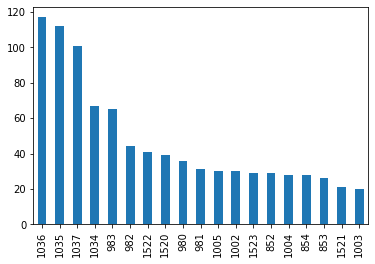

In [111]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

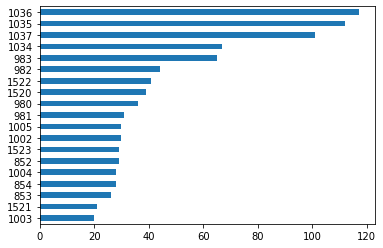

In [113]:
#grafico de barras horzzontais plot.barh
df["LojaID"].value_counts(ascending=True).plot.barh();

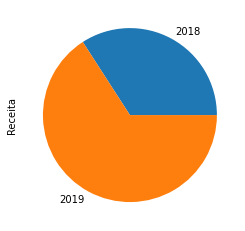

In [115]:
#grafico de pizza  .plot.pie (grafico pizza)
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [116]:
#total de venda por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

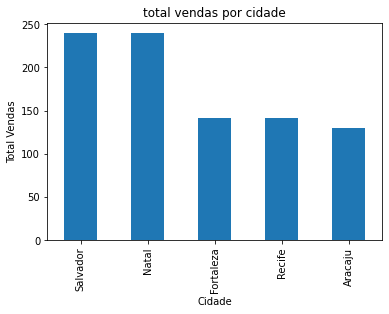

In [117]:
#adicionnando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");


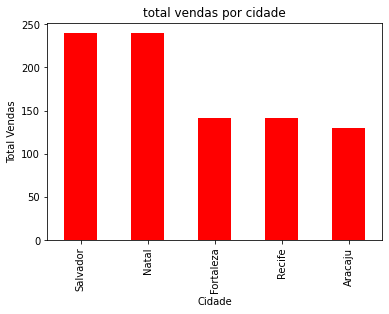

In [118]:
#alterando por COR
df["Cidade"].value_counts().plot.bar(title="total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [120]:
#alterando stylo do grafico
plt.style.use("ggplot")

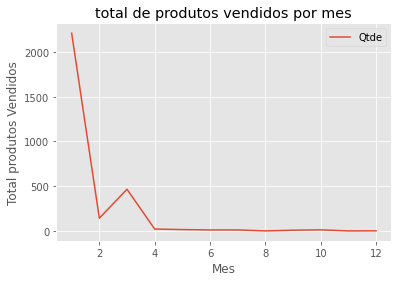

In [123]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "total de produtos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("Total produtos Vendidos");
plt.legend();

In [124]:
df.groupby(df["mes_venda"]) ["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [127]:
#selecionando apneas as venda de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

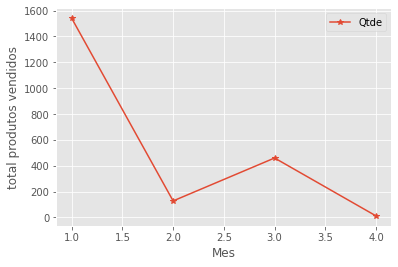

In [130]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mes")
plt.ylabel("total produtos vendidos");
plt.legend();

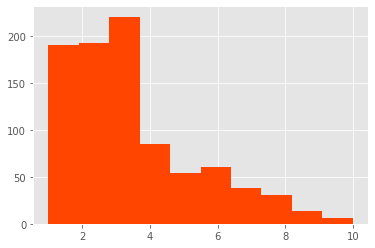

In [132]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

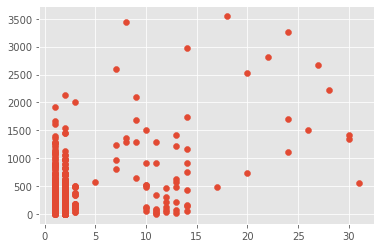

In [133]:
#grafico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

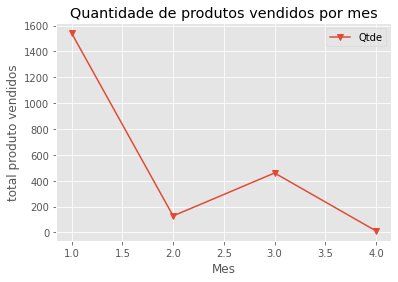

In [134]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("total produto vendidos");
plt.legend()
plt.savefig("grafico QTDE x mes.png")